<a href="https://colab.research.google.com/github/Keilamorante09/PROYECTO-PRIMER-PARCIAL/blob/Rama1_Proyecto/Proyecto_PS_1erP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

	***  ****  *** ***  ***  ***  ***  *** ***  ***
	   **    **   **  **   **   **   **   **  **
		 Procesos de Software--Word Cloud
	   **    **   **  **   **   **   **   **  **
	***  ****  *** ***  ***  ***  ***  *** ***  ***


	 UNIVERSIDAD DE GUAYAQUIL
Integrantes:
--ESPINOZA ORRALA DAYANNA
--MORANTE MURILLO KEILA
--QUINTERO FIGUEROA ROGER



	 SOS-S-MA-3-2
Debe introducir un ID valido en Espanol,
De los usuario en https://es.stackoverflow.com/users/

 Ingrese ID: 31764

El scraping se realiza desde la página https://es.stackoverflow.com/users/31764?tab=tags&sort=votes&page=1

El usuario tiene 352 etiquetas.

	 ︵︵︵︵︵︵︵︵︵︵
	(    WORD CLOUD    )
 	︶︶︶︶︶︶︶︶︶︶




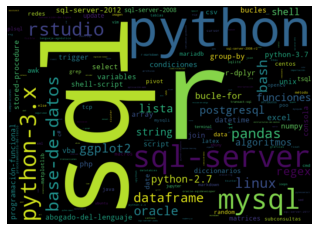

In [19]:

import os
import requests as rq
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
 

# listas
etiquetas=list()
votos=list()

print("\t***  ****  *** ***  ***  ***  ***  *** ***  ***")
print("\t   **    **   **  **   **   **   **   **  **")
print("\t\t Procesos de Software--Word Cloud")
print("\t   **    **   **  **   **   **   **   **  **")
print("\t***  ****  *** ***  ***  ***  ***  *** ***  ***")
print("\n")
print("\t UNIVERSIDAD DE GUAYAQUIL")
print('''Integrantes:
--ESPINOZA ORRALA DAYANNA
--MORANTE MURILLO KEILA
--QUINTERO FIGUEROA ROGER\n''')
print("\n")
print("\t SOS-S-MA-3-2")


print('''Debe introducir un ID valido en Espanol,
De los usuario en https://es.stackoverflow.com/users/''')

#ID del usuario
ID=input("\n Ingrese ID: ")

#web scraping
vineta=0   #vineta=viñeta( numero de paginas de usuario)
while True:
  
  #link de la página
  link='https://es.stackoverflow.com/users/'+ID+'?tab=tags&sort=votes&page='+str(vineta+1)
  
  #Para que muestre el link solo en la primera iteración
  if vineta==0:
    print("\nEl scraping se realiza desde la página "+link+"\n")
  
  page=rq.get(link) #Se obtiene el contenido de la página
  soup=bs(page.content, 'html.parser')
  paginas=soup.find('div', class_='s-pagination--item is-selected') # None
  
  #para ver la primera pagina
  if paginas==None and vineta==0: # paginas=None y vineta=4
    paginas=' '
  if paginas!=None: #paginas=None
  
    #si el usuario no existe
    try:
      #Se guardan las etiquetas y los votos
      tagTable=soup.find('table', class_='user-tags')
      etiq=tagTable.find_all('a', class_='post-tag') # tag=<a href="/search?q=user:108737+[numpy]" class="post-tag" title="mostrar todas las publicaciones de este usuario en &quot;numpy&quot;">numpy</a>
      votes=tagTable.find_all('div', class_='answer-votes') # votes=<div class="answer-votes" title="Formuló 1 pregunta que no es de wiki con una puntuación total de 3. Proporcionó 18 respuestas que no son de wiki con una puntuación total de 14." onclick="window.location.href='/search?q=user:108737+[numpy]'">2m</div>
      # etiq=numero 
      for x in etiq:
        etiquetas.append(x.text)
      for x in votes:
        dig=''
        if x.text=='0':
          votos.append(0.001)
        else:
          for y in x.text: # 2m
          #K=miles M=millones
            if y!='k' and y!='m': # m
              dig+=y   #dig guarda valores
            else:
              if y=='k':
                # int("string") -> convierte el "string" a "int"
                dig=int(dig)*10**3 # dig='2' -> int(dig)=2 -> 2*(10^3) = 2000
              if y=='m':
                dig=int(dig)*10**6  #-> convierte el "string" a "int"
          votos.append(int(dig))
          # hasta aqui las etiquetas y votos tienen datos guardados 
    except:
      print("No existe usuario o no tiene etiqueta") 
    vineta+=1
  else:
    break

if etiquetas!=[]:
  ###
   
  print("El usuario tiene "+str(len(etiquetas))+" etiquetas.\n")
  votos_T=tuple(votos)

  #Se crea el diccionario de datos con las etiquetas y los votos
  d=dict(zip(etiquetas, votos_T))

  # Ejemplo del diccionario:
  # python - 284
  # et2 - 900
  # et3 - 800


  
  print("\t ︵︵︵︵︵︵︵︵︵︵")
  print("\t(    WORD CLOUD    )")
  print(" \t︶︶︶︶︶︶︶︶︶︶")
  print("\n")

  wc=WordCloud(background_color="black", width=700, height=500).generate_from_frequencies(d)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()